In [4]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

In [3]:
basePath = "/kaggle/input/eurosat-dataset/EuroSAT"

annualCrop_dir = basePath + "/AnnualCrop"
forest_dir = basePath + "/Forest"
herbaceousVegetation_dir = basePath + "/HerbaceousVegetation"
highway_dir = basePath + "/Highway"
industrial_dir = basePath + "/Industrial"
pasture_dir = basePath + "/Pasture"
permanentCrop_dir = basePath + "/PermanentCrop"
residential_dir = basePath + "/Residential"
river_dir = basePath + "/River"
seaLake_dir = basePath + "/SeaLake"

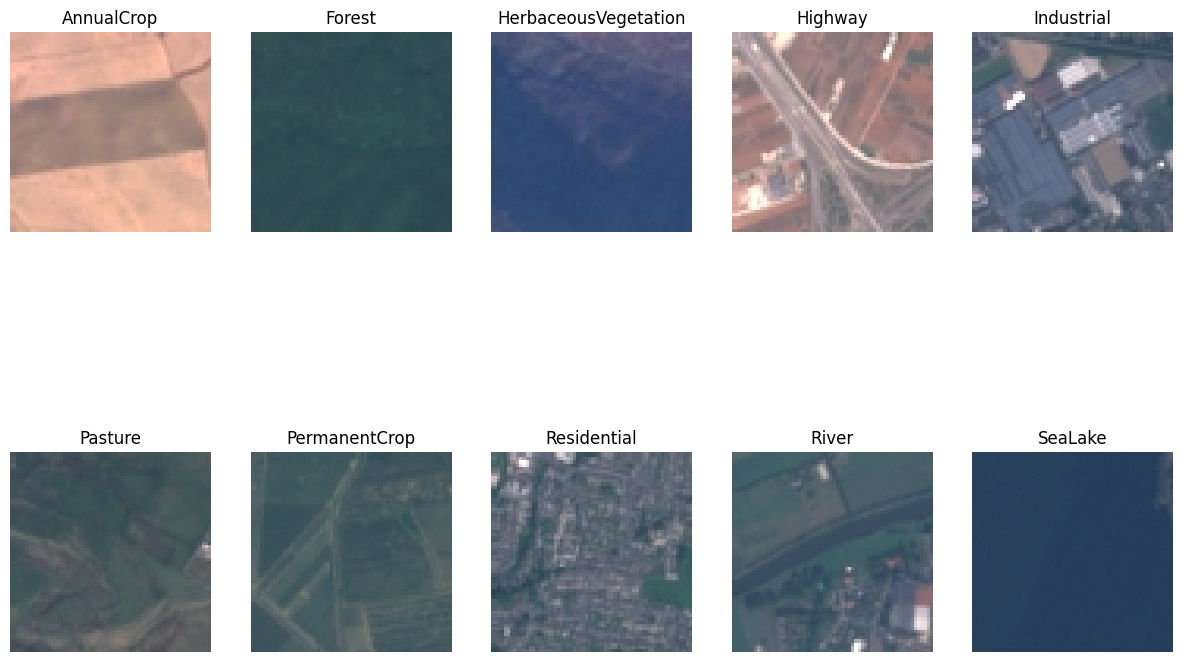

In [5]:
dirs = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", 
        "Industrial", "Pasture", "PermanentCrop", "Residential", 
        "River", "SeaLake"]

plt.figure(figsize=(15, 10))
for i, dir_name in enumerate(dirs, start=1):
    path = os.path.join(basePath, dir_name)
    image_files = os.listdir(path)
    sample_image = mpimg.imread(os.path.join(path, image_files[0]))
    plt.subplot(2, 5, i)
    plt.imshow(sample_image)
    plt.title(dir_name)
    plt.axis('off')
plt.show()

In [6]:
dirlist = [basePath + "/AnnualCrop", basePath + "/Forest",
           basePath + "/HerbaceousVegetation", basePath + "/Highway",
           basePath + "/Industrial", basePath + "/Pasture",
           basePath + "/PermanentCrop", basePath + "/Residential",
           basePath + "/River", basePath + "/SeaLake"]


classes=["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", 
        "Industrial", "Pasture", "PermanentCrop", "Residential", 
        "River", "SeaLake"]

filepaths=[]; labels=[]

for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
        
Files = pd.Series(filepaths, name='path')
Label = pd.Series(labels, name='class_label')
df = pd.concat([Files,Label], axis=1)
df.sample(5)

,path,class_label
12810,/kaggle/input/eurosat-dataset/EuroSAT/Industri...,Industrial
24888,/kaggle/input/eurosat-dataset/EuroSAT/SeaLake/...,SeaLake
25048,/kaggle/input/eurosat-dataset/EuroSAT/SeaLake/...,SeaLake
6250,/kaggle/input/eurosat-dataset/EuroSAT/Herbaceo...,HerbaceousVegetation
22752,/kaggle/input/eurosat-dataset/EuroSAT/River/Ri...,River


In [7]:
print('Total images in the dataset:', len(df))

Total images in the dataset: 27000


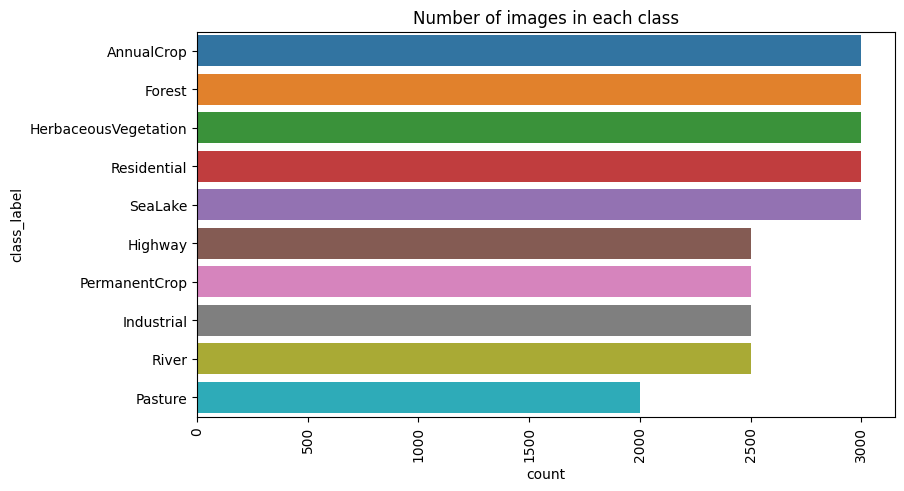

In [8]:
l = df['class_label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(y = l.index, x = l)
plt.title("Number of images in each class")
plt.xticks(rotation=90)
plt.show()

In [9]:
df = shuffle(df)
df.head()

,path,class_label
600,/kaggle/input/eurosat-dataset/EuroSAT/AnnualCr...,AnnualCrop
18485,/kaggle/input/eurosat-dataset/EuroSAT/Permanen...,PermanentCrop
8136,/kaggle/input/eurosat-dataset/EuroSAT/Herbaceo...,HerbaceousVegetation
21971,/kaggle/input/eurosat-dataset/EuroSAT/River/Ri...,River
11672,/kaggle/input/eurosat-dataset/EuroSAT/Industri...,Industrial


In [11]:
train_df, test_df = train_test_split(df, train_size = 0.80, random_state = 18)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_dataframe(dataframe = train_df, x_col = "path", y_col = "class_label",
                                                 target_size = (150, 150), class_mode = "categorical",
                                                 batch_size = 32, shuffle = True, seed = 42)

Found 21600 validated image filenames belonging to 10 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_dataframe(dataframe = test_df, x_col = "path", y_col = "class_label",
                                            target_size = (150, 150), class_mode = "categorical",
                                            shuffle = False, batch_size = 32)

Found 5400 validated image filenames belonging to 10 classes.


In [14]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer= tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,618 (4.92 MB)

 Trainable params: 1,288,618 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = model.fit(training_set, epochs = 10, validation_data = test_set, shuffle = True)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.2931 - loss: 1.7983

W0000 00:00:1712168578.920169      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 184s 270ms/step - accuracy: 0.2932 - loss: 1.7980 - val_accuracy: 0.5622 - val_loss: 1.2375
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.5443 - loss: 1.2557 - val_accuracy: 0.6841 - val_loss: 0.9484
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.6482 - loss: 1.0133 - val_accuracy: 0.7265 - val_loss: 0.7805
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.7031 - loss: 0.8631 - val_accuracy: 0.7480 - val_loss: 0.7423
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.7391 - loss: 0.7617 - val_accuracy: 0.7248 - val_loss: 0.8268
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.7883 - loss: 0.6217 - val_accuracy: 0.7769 - val_loss: 0.6329
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.8149 - loss: 0.5410 - val_accuracy: 0.7672 - val_loss: 0.6860
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.8458 - loss: 0.4738 - val_accur

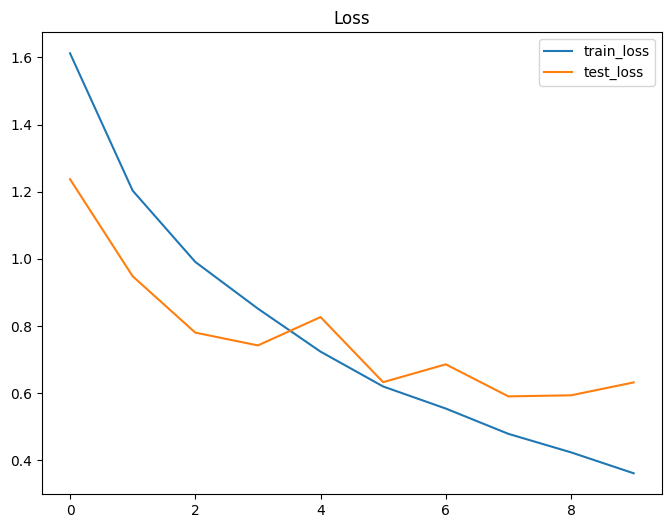

In [17]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="test_loss")
plt.title('Loss')
plt.legend()
plt.show()

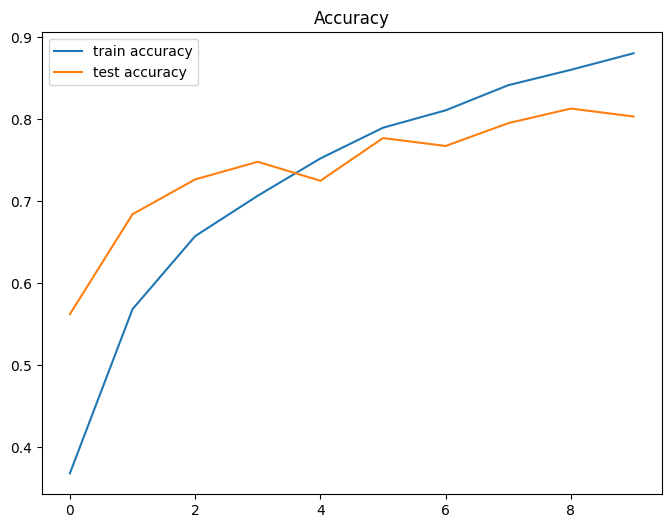

In [18]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="test accuracy")
plt.title('Accuracy')
plt.legend()
plt.show()

In [19]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape = (150, 150, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer= tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 146, 146, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 33, 33, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 351,754 (1.34 MB)

 Trainable params: 351,754 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
hist = model.fit(training_set, epochs = 10, validation_data = test_set, shuffle = True)

Epoch 1/10
  1/675 ━━━━━━━━━━━━━━━━━━━━ 4:35:58 25s/step - accuracy: 0.0938 - loss: 2.2979

W0000 00:00:1712169023.249752      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.2331 - loss: 1.9658

W0000 00:00:1712169083.294480      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.2332 - loss: 1.9655 - val_accuracy: 0.5091 - val_loss: 1.4056
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 70s 103ms/step - accuracy: 0.4960 - loss: 1.3841 - val_accuracy: 0.6957 - val_loss: 0.8480
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 97ms/step - accuracy: 0.6565 - loss: 0.9796 - val_accuracy: 0.7150 - val_loss: 0.7986
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 67s 98ms/step - accuracy: 0.7127 - loss: 0.8207 - val_accuracy: 0.7778 - val_loss: 0.6513
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 67s 98ms/step - accuracy: 0.7530 - loss: 0.7086 - val_accuracy: 0.7900 - val_loss: 0.5885
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - accuracy: 0.7831 - loss: 0.6289 - val_accuracy: 0.7943 - val_loss: 0.5751
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 97ms/step - accuracy: 0.8036 - loss: 0.5645 - val_accuracy: 0.7874 - val_loss: 0.5925
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - accuracy: 0.8269 - loss: 0.5035 - val_accur

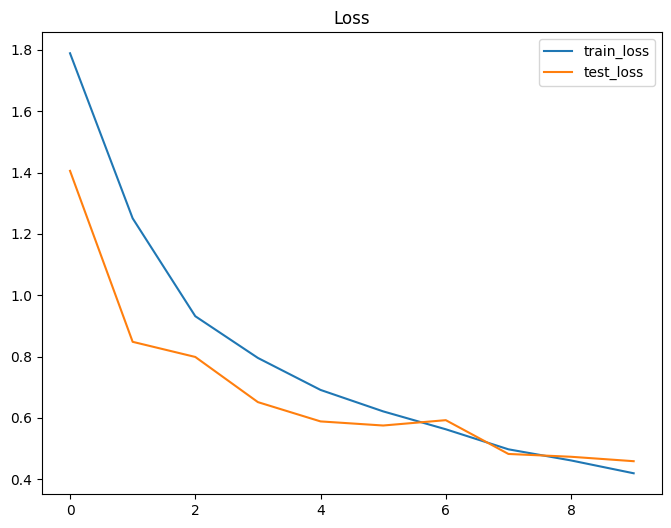

In [21]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="test_loss")
plt.title('Loss')
plt.legend()
plt.show()

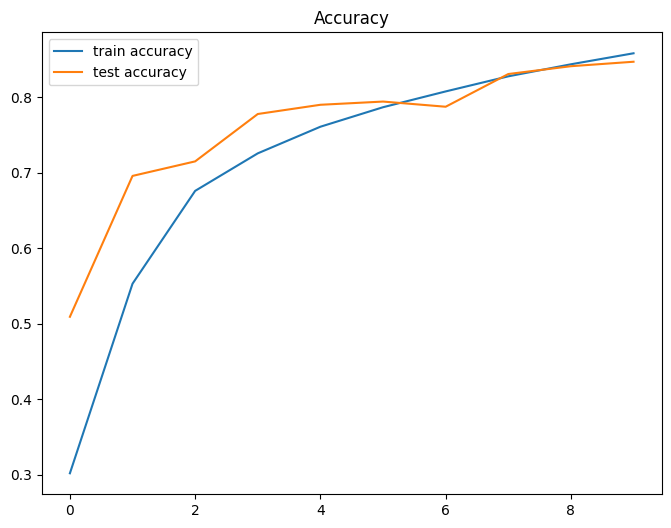

In [22]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="test accuracy")
plt.title('Accuracy')
plt.legend()
plt.show()

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in vgg_base.layers:
    layer.trainable = False

input_tensor = Input(shape=(150, 150, 3))
vgg_output = vgg_base(input_tensor)
flatten_layer = Flatten()(vgg_output)
dense_layer1 = Dense(128, activation='relu')(flatten_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer1)
dropout_layer = Dropout(0.5)(dense_layer2)
output_layer = Dense(10, activation='sigmoid')(dropout_layer)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(loss='categorical_crossentropy', optimizer= tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,772,298 (60.17 MB)

 Trainable params: 1,057,610 (4.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
hist = model.fit(training_set, epochs = 10, validation_data = test_set, shuffle = True)

Epoch 1/10
  2/675 ━━━━━━━━━━━━━━━━━━━━ 53s 79ms/step - accuracy: 0.0859 - loss: 2.5470   

W0000 00:00:1712170083.883680      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5048 - loss: 1.3738

W0000 00:00:1712170132.971292      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 95s 110ms/step - accuracy: 0.5050 - loss: 1.3733 - val_accuracy: 0.8044 - val_loss: 0.5871
Epoch 2/10


W0000 00:00:1712170157.840358      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.7871 - loss: 0.6429 - val_accuracy: 0.8556 - val_loss: 0.4295
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.8451 - loss: 0.4903 - val_accuracy: 0.8711 - val_loss: 0.3744
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 62s 91ms/step - accuracy: 0.8685 - loss: 0.4180 - val_accuracy: 0.8807 - val_loss: 0.3663
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.8831 - loss: 0.3709 - val_accuracy: 0.8713 - val_loss: 0.4072
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 59s 88ms/step - accuracy: 0.8944 - loss: 0.3350 - val_accuracy: 0.8793 - val_loss: 0.3789
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.9045 - loss: 0.3065 - val_accuracy: 0.8757 - val_loss: 0.4026
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.9132 - loss: 0.2696 - val_accuracy: 0.8785 - val_loss: 0.3924
Epoch 9/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 60s 89ms/step - accuracy: 0.9189 - loss: 0.2612 - val_accurac

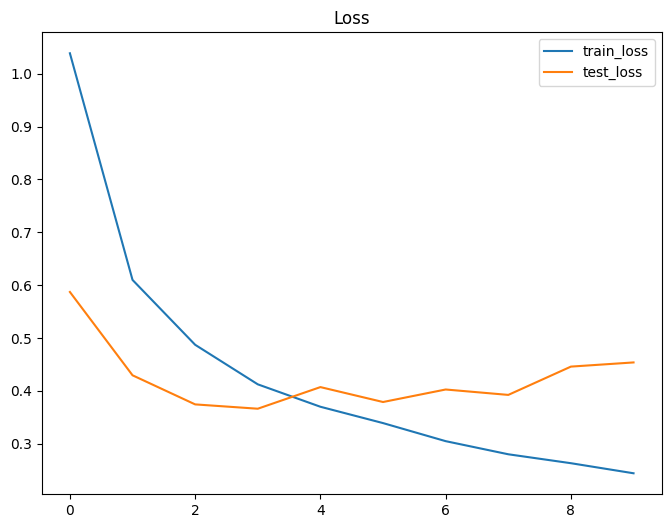

In [29]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="test_loss")
plt.title('Loss')
plt.legend()
plt.show()

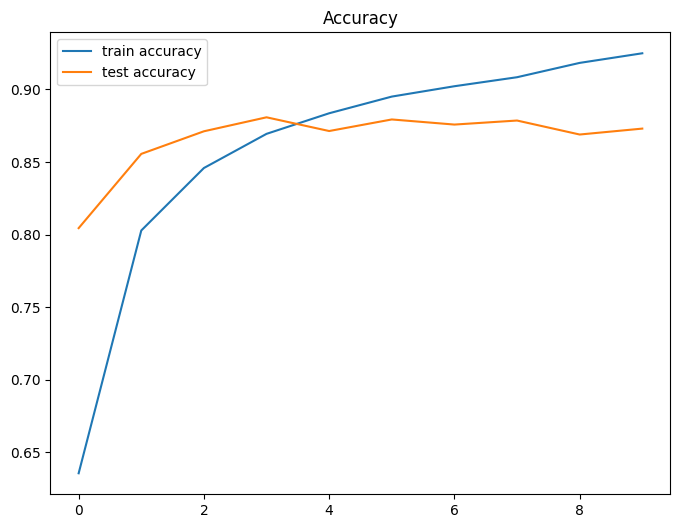

In [30]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="test accuracy")
plt.title('Accuracy')
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.applications import ResNet50

resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in resnet_base.layers:
    layer.trainable = False

input_tensor = Input(shape=(150, 150, 3))
resnet_output = resnet_base(input_tensor)
flatten_layer = Flatten()(resnet_output)
dense_layer1 = Dense(128, activation='relu')(flatten_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer1)
dropout_layer = Dropout(0.5)(dense_layer2)
output_layer = Dense(10, activation='sigmoid')(dropout_layer)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(loss='categorical_crossentropy', optimizer= tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,150,346 (115.01 MB)

 Trainable params: 6,562,634 (25.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
hist = model.fit(training_set, epochs = 10, validation_data = test_set, shuffle = True)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - accuracy: 0.1592 - loss: 2.2691 - val_accuracy: 0.3026 - val_loss: 1.8164
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.2825 - loss: 1.8291 - val_accuracy: 0.3407 - val_loss: 1.6221
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3262 - loss: 1.7002 - val_accuracy: 0.3793 - val_loss: 1.6277
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.3407 - loss: 1.6634 - val_accuracy: 0.3730 - val_loss: 1.5464
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3442 - loss: 1.6564 - val_accuracy: 0.3337 - val_loss: 1.6008
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3548 - loss: 1.6275 - val_accuracy: 0.3935 - val_loss: 1.5117
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3609 - loss: 1.6080 - val_accuracy: 0.3867 - val_loss: 1.5061
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.3783 - loss: 1.5795 - 

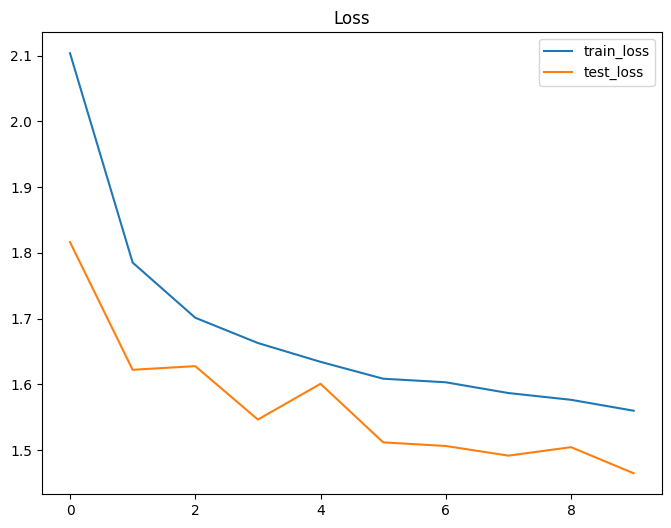

In [34]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="test_loss")
plt.title('Loss')
plt.legend()
plt.show()

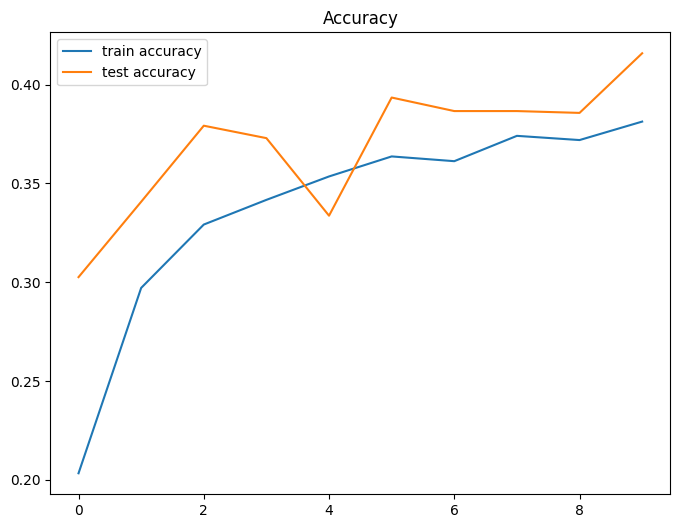

In [35]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="test accuracy")
plt.title('Accuracy')
plt.legend()
plt.show()

In [37]:
from tensorflow.keras.applications import InceptionV3

inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in inception_base.layers:
    layer.trainable = False

input_tensor = Input(shape=(150, 150, 3))
inception_output = inception_base(input_tensor)
flatten_layer = Flatten()(inception_output)

dense_layer1 = Dense(128, activation='relu')(flatten_layer)
dense_layer2 = Dense(64, activation='relu')(dense_layer1)
dropout_layer = Dropout(0.5)(dense_layer2)
output_layer = Dense(10, activation='sigmoid')(dropout_layer)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(loss='categorical_crossentropy', optimizer= tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,171,114 (92.21 MB)

 Trainable params: 2,368,330 (9.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [38]:
hist = model.fit(training_set, epochs = 10, validation_data = test_set, shuffle = True)

Epoch 1/10
  5/675 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.1050 - loss: 3.5836 

W0000 00:00:1712171448.750309      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


674/675 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6398 - loss: 1.1926

W0000 00:00:1712171481.980481      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 70s 73ms/step - accuracy: 0.6401 - loss: 1.1915 - val_accuracy: 0.8839 - val_loss: 0.3728
Epoch 2/10


W0000 00:00:1712171498.063371      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.8723 - loss: 0.4227 - val_accuracy: 0.8828 - val_loss: 0.3878
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.9046 - loss: 0.2999 - val_accuracy: 0.8730 - val_loss: 0.4230
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.9095 - loss: 0.2272 - val_accuracy: 0.8756 - val_loss: 0.4644
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9163 - loss: 0.1697 - val_accuracy: 0.8491 - val_loss: 0.4343
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.9069 - loss: 0.1384 - val_accuracy: 0.8828 - val_loss: 0.4485
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.9198 - loss: 0.1148 - val_accuracy: 0.8539 - val_loss: 0.5352
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 47ms/step - accuracy: 0.9210 - loss: 0.0942 - val_accuracy: 0.8872 - val_loss: 0.5165
Epoch 9/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9187 - loss: 0.1008 - val_accurac

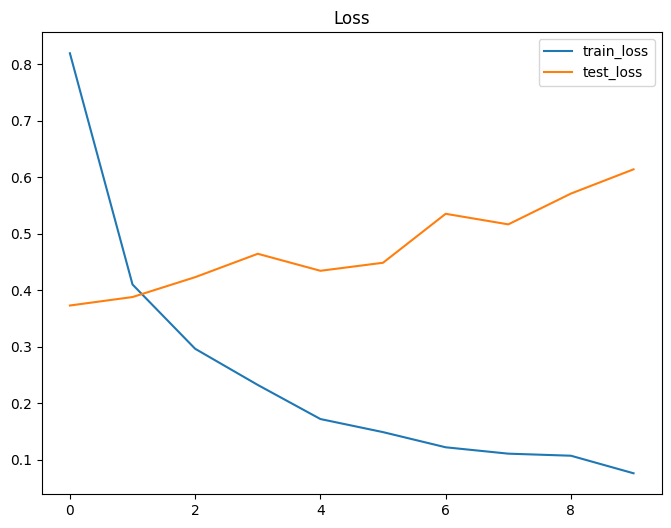

In [39]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="test_loss")
plt.title('Loss')
plt.legend()
plt.show()

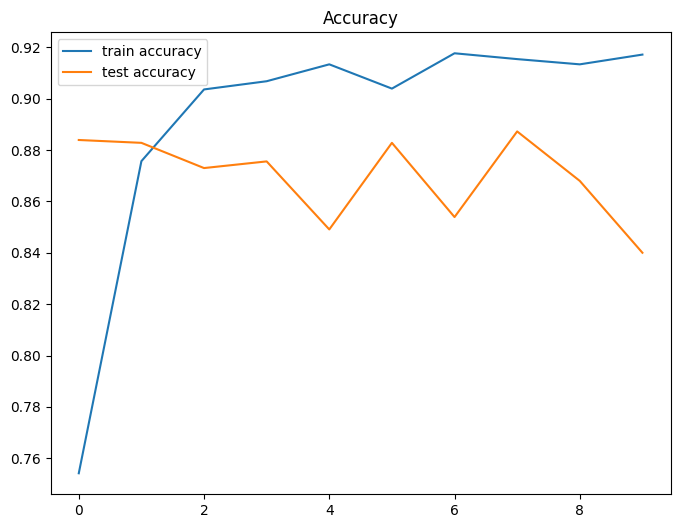

In [40]:
plt.figure(figsize=(8,6))
plt.plot(hist.history["accuracy"],label="train accuracy")
plt.plot(hist.history["val_accuracy"],label="test accuracy")
plt.title('Accuracy')
plt.legend()
plt.show()